# Data Analysis

In [42]:
import pandas as pd
import preprocessing

In [43]:
df = preprocessing.preprocessed_data('data')

for row in df.columns:
    print(row)
    if row == 'ResponseId_Response ID' or row == 'Q0_Do you live in or frequently visit the city of Groningen?' or row == 'Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?' or row == 'Q16_Is there anything you would like to add about your opinion on CCTV surveillance? (Optional)':
        continue
    print(df[row].unique())

ResponseId_Response ID
Q0_Do you live in or frequently visit the city of Groningen?
Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?
Q2_Do you think the municipality currently uses AI  (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?
['Probably not' 'No, definitely not' 'Probably' 'I don’t know'
 'Yes, definitely']
Q3_Do you think the municipality should use AI with its CCTV surveillance system?
['Probably not' 'Probably' 'No, definitely not' 'Yes, definitely'
 'I don’t know']
Q4_Do you think there should be more or fewer CCTV surveillance cameras in the city centre of Groningen?
['Somewhat more' 'Significantly fewer' 'Significantly more' 'Not sure'
 'About the same' 'Somewhat fewer']
Q5_To what extent are you concerned about privacy related to CCTV surveillance cameras in Groningen?
['Slightly concerned' 'Not concerned at all' 'Very concerned'
 'Moderately concerned' 'Extremely concern

### Q1

In [44]:
Q1 = "Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?"
print(df[Q1].describe())

count          228.0
mean      318.377193
std      1079.308654
min              0.0
25%             20.0
50%             50.0
75%            162.5
max          10000.0
Name: Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?, dtype: Float64


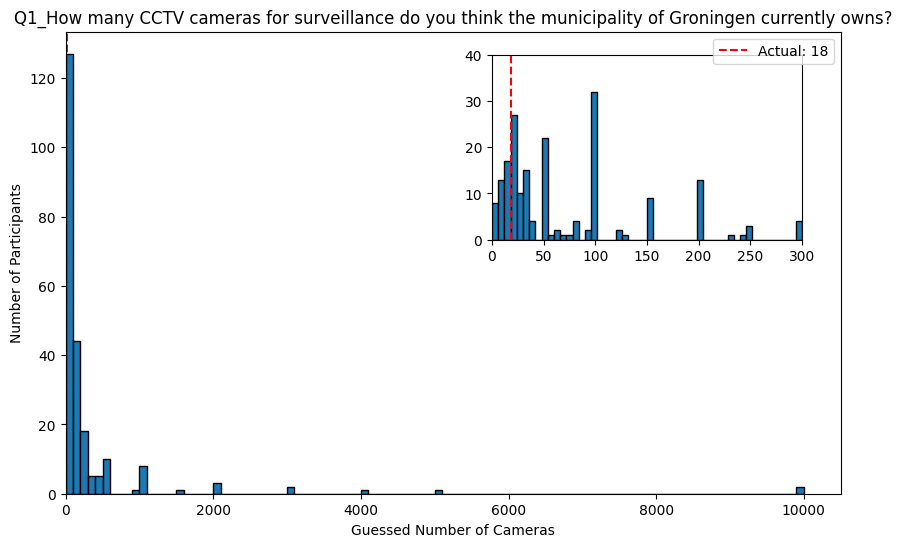

In [45]:
import matplotlib.pyplot as plt

# Drop NaN values
df_nonan_Q1 = df[Q1].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_nonan_Q1, bins=100, edgecolor='black')
ax.axvline(x=18, color='red', linestyle='--', label='Actual: 18')
ax.set_xlim(left=0)  

ax.set_title('Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?')
ax.set_xlabel('Guessed Number of Cameras')
ax.set_ylabel('Number of Participants')
ax.legend()

# Create the inset for the zoomed-in view 
df_clipped_Q1 = df_nonan_Q1[df_nonan_Q1 <= 300]

x1, x2, y1, y2 = df_clipped_Q1.min(), df_clipped_Q1.max(), 0, 40  
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4],  
                      xlim=(x1, x2), ylim=(y1, y2))  
axins.hist(df_clipped_Q1, bins=50, edgecolor='black')

# Add a vertical line for the actual value (18) in the inset plot
axins.axvline(x=18, color='red', linestyle='--', label='Actual: 18')

plt.show()

In [46]:
# Count people who think the number of cameras is less than 18
less_than_18 = df_nonan_Q1[df_nonan_Q1 < 18]
count_less_than_18 = len(less_than_18)
percent_less_than_18 = (count_less_than_18 / len(df_nonan_Q1)) * 100

# Count people who think the number of cameras is exactly 18
exactly_18 = df_nonan_Q1[df_nonan_Q1 == 18]
count_exactly_18 = len(exactly_18)
percent_exactly_18 = (count_exactly_18 / len(df_nonan_Q1)) * 100

# Count people who think the number of cameras is more than 18
more_than_18 = df_nonan_Q1[df_nonan_Q1 > 18]
count_more_than_18 = len(more_than_18)
percent_more_than_18 = (count_more_than_18 / len(df_nonan_Q1)) * 100

print(len(df_nonan_Q1))
print(df_nonan_Q1.median())
print(f"People who think there are less than 18 cameras: {count_less_than_18} ({percent_less_than_18:.2f}%)")
print(f"People who think there are exactly 18 cameras: {count_exactly_18} ({percent_exactly_18:.2f}%)")
print(f"People who think there are more than 18 cameras: {count_more_than_18} ({percent_more_than_18:.2f}%)")

228
50.0
People who think there are less than 18 cameras: 38 (16.67%)
People who think there are exactly 18 cameras: 3 (1.32%)
People who think there are more than 18 cameras: 187 (82.02%)


### Q2, Q3, Q6, Q7

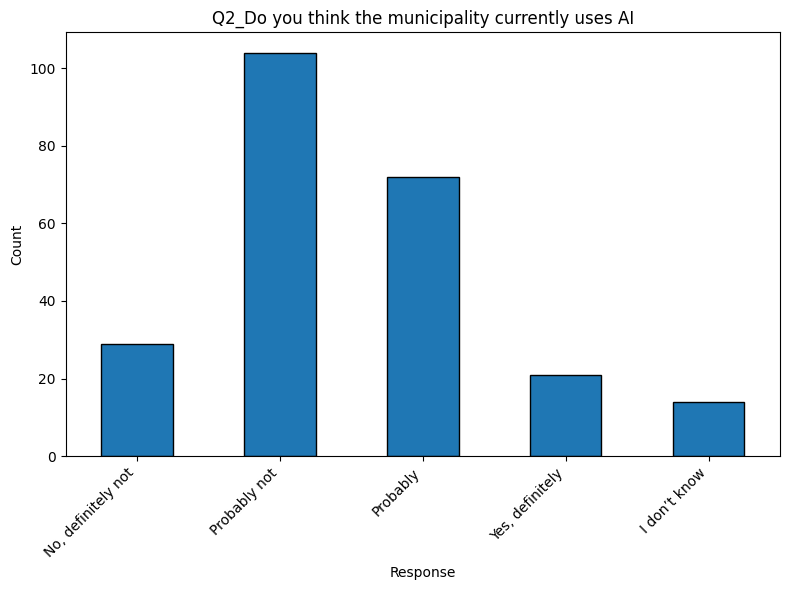

Q2_Do you think the municipality currently uses AI  (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?
No, definitely not     29
Probably not          104
Probably               72
Yes, definitely        21
I don’t know           14
Name: count, dtype: int64


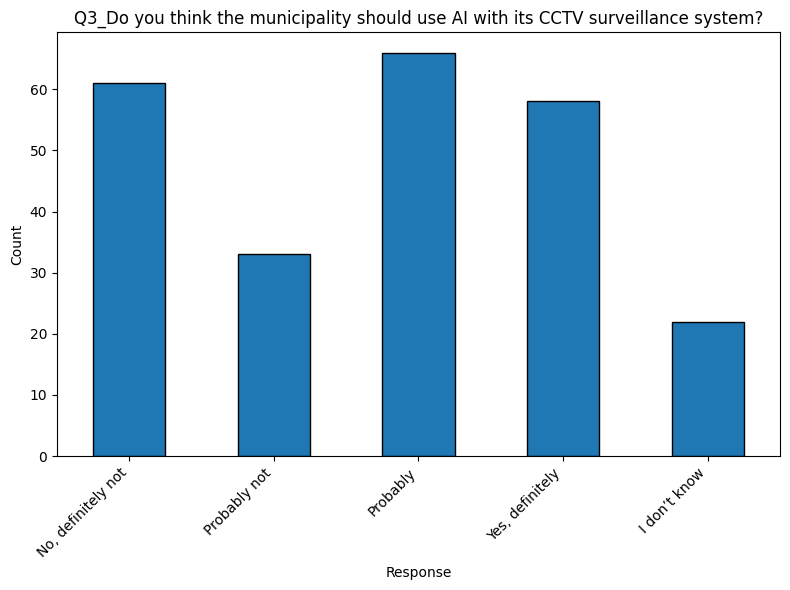

Q3_Do you think the municipality should use AI with its CCTV surveillance system?
No, definitely not    61
Probably not          33
Probably              66
Yes, definitely       58
I don’t know          22
Name: count, dtype: int64


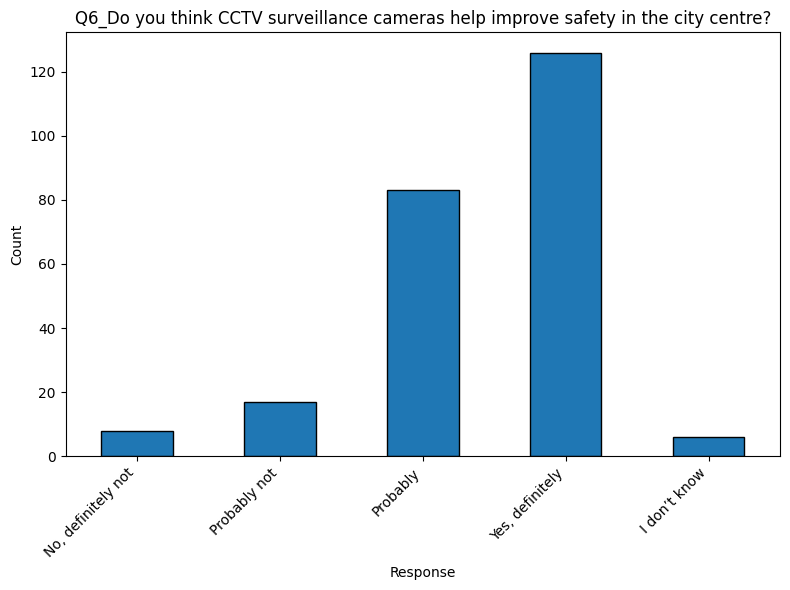

Q6_Do you think CCTV surveillance cameras help improve safety in the city centre?
No, definitely not      8
Probably not           17
Probably               83
Yes, definitely       126
I don’t know            6
Name: count, dtype: int64


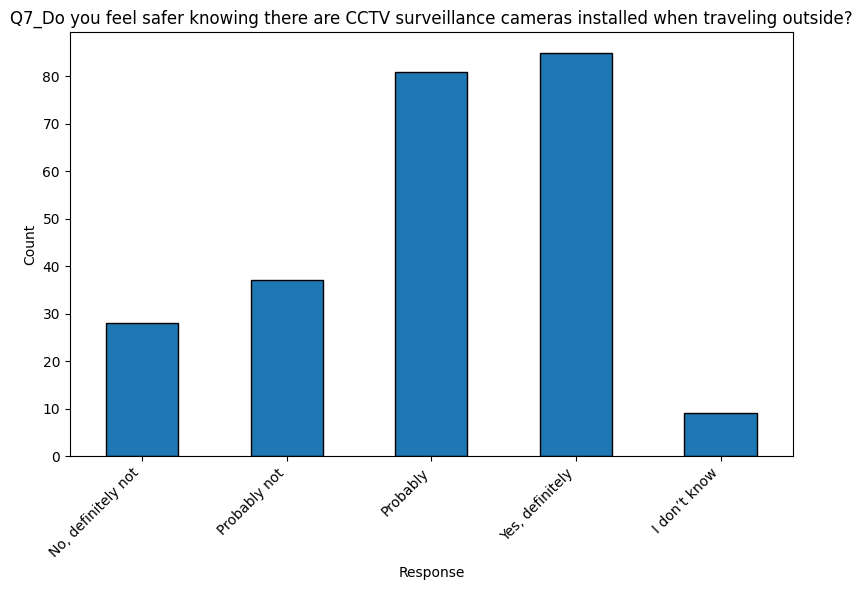

Q7_Do you feel safer knowing there are CCTV surveillance cameras installed when traveling outside?
No, definitely not    28
Probably not          37
Probably              81
Yes, definitely       85
I don’t know           9
Name: count, dtype: int64


In [47]:
# Definetely not - definetely questions
questions = ['Q2_Do you think the municipality currently uses AI  (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?',
       'Q3_Do you think the municipality should use AI with its CCTV surveillance system?',
       'Q6_Do you think CCTV surveillance cameras help improve safety in the city centre?',
       'Q7_Do you feel safer knowing there are CCTV surveillance cameras installed when traveling outside?']

custom_order = ['No, definitely not', 'Probably not', 'Probably', 'Yes, definitely', 'I don’t know']

for question in questions:
    response_counts = df[question].value_counts().reindex(custom_order)
    
    plt.figure(figsize=(8, 6))
    response_counts.plot(kind='bar', edgecolor='black')
    plt.title(question)
    if question == 'Q2_Do you think the municipality currently uses AI  (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?':
        plt.title('Q2_Do you think the municipality currently uses AI')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(response_counts)
    

### Q4

In [48]:
Q4 = "Q4_Do you think there should be more or fewer CCTV surveillance cameras in the city centre of Groningen?"
df[Q4].unique()

array(['Somewhat more', 'Significantly fewer', 'Significantly more',
       'Not sure', 'About the same', 'Somewhat fewer'], dtype=object)

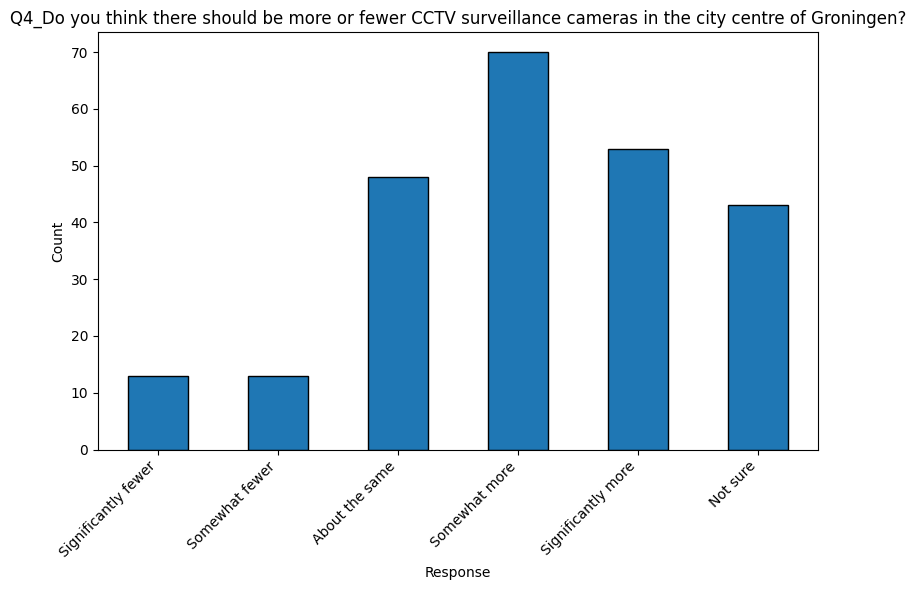

Q4_MoreOrFewer
Significantly fewer    13
Somewhat fewer         13
About the same         48
Somewhat more          70
Significantly more     53
Not sure               43
Name: count, dtype: int64


In [49]:
custom_order = ['Significantly fewer', 'Somewhat fewer', 'About the same', 'Somewhat more', 'Significantly more', 'Not sure']

# Convert the column to a categorical type 
df['Q4_MoreOrFewer'] = pd.Categorical(df[Q4], categories=custom_order, ordered=True)

response_counts = df['Q4_MoreOrFewer'].value_counts().reindex(custom_order)

# Plotting the distribution 
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', edgecolor='black')
plt.title('Q4_Do you think there should be more or fewer CCTV surveillance cameras in the city centre of Groningen?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(response_counts)

### Q5

In [50]:
df['Q5_To what extent are you concerned about privacy related to CCTV surveillance cameras in Groningen?'].unique()

array(['Slightly concerned', 'Not concerned at all', 'Very concerned',
       'Moderately concerned', 'Extremely concerned'], dtype=object)

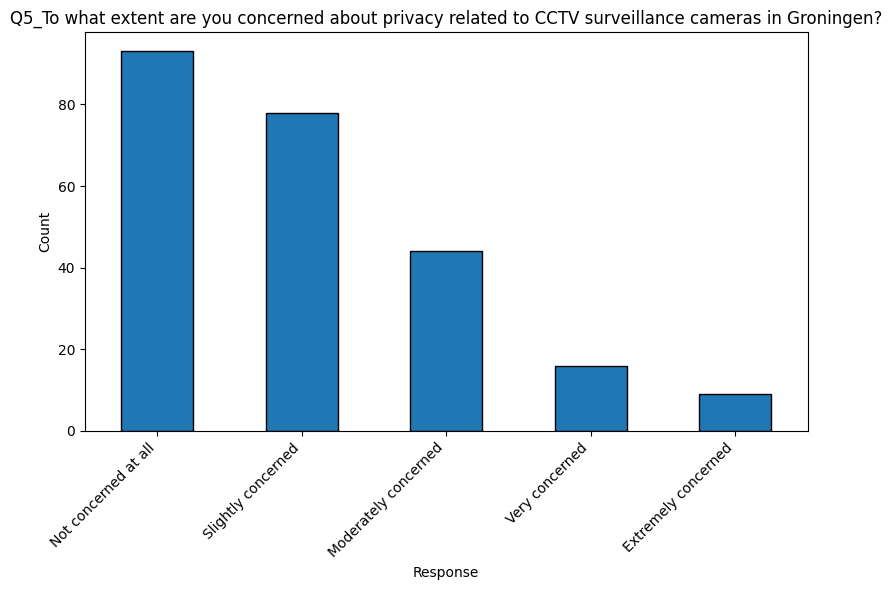

Q5_To what extent are you concerned about privacy related to CCTV surveillance cameras in Groningen?
Not concerned at all    93
Slightly concerned      78
Moderately concerned    44
Very concerned          16
Extremely concerned      9
Name: count, dtype: int64


In [51]:
question = 'Q5_To what extent are you concerned about privacy related to CCTV surveillance cameras in Groningen?'

custom_order = ['Not concerned at all', 'Slightly concerned', 'Moderately concerned', 'Very concerned', 'Extremely concerned']

response_counts = df[question].value_counts().reindex(custom_order)
    
# Plotting the distribution 
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', edgecolor='black')
plt.title(question)
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(response_counts)

### Q8

In [52]:
df['Q8_Do you know how the data collected from the CCTV surveillance cameras is stored?'].unique()

array(['Somewhat', 'Yes, definitely', 'Not at all'], dtype=object)

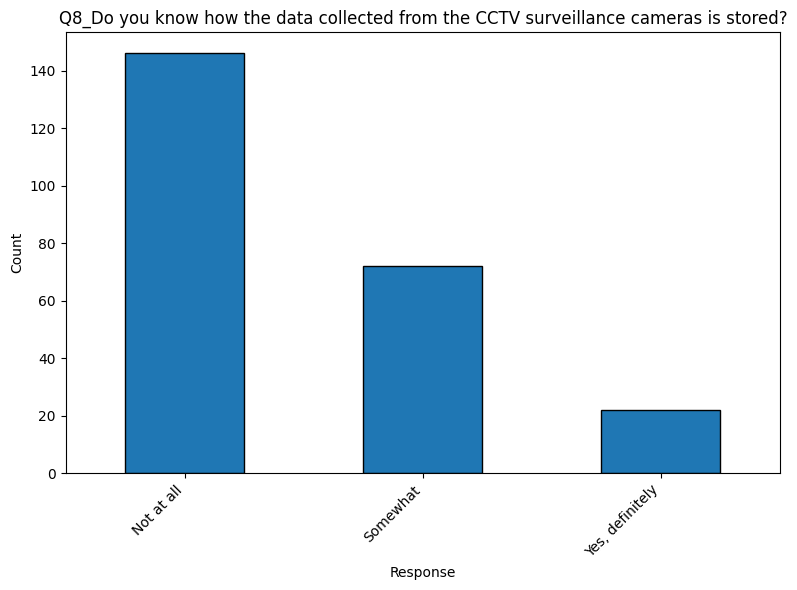

Q8_Do you know how the data collected from the CCTV surveillance cameras is stored?
Not at all         146
Somewhat            72
Yes, definitely     22
Name: count, dtype: int64


In [53]:
question = 'Q8_Do you know how the data collected from the CCTV surveillance cameras is stored?'

custom_order = ['Not at all', 'Somewhat', 'Yes, definitely']

response_counts = df[question].value_counts().reindex(custom_order)
    
# Plotting the distribution 
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', edgecolor='black')
plt.title(question)
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(response_counts)

### Q10

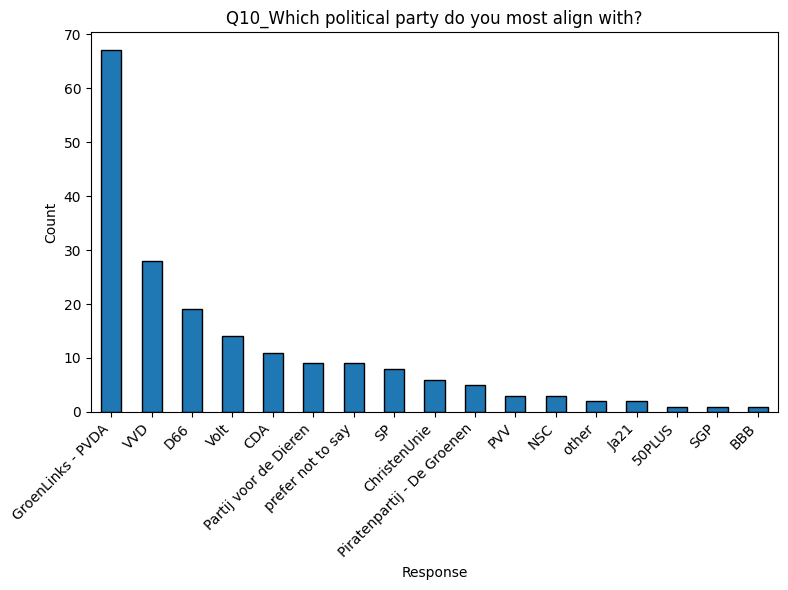

Q10_Which political party do you most align with? (Optional)
GroenLinks - PVDA             67
VVD                           28
D66                           19
Volt                          14
CDA                           11
Partij voor de Dieren          9
prefer not to say              9
SP                             8
ChristenUnie                   6
Piratenpartij - De Groenen     5
PVV                            3
NSC                            3
other                          2
Ja21                           2
50PLUS                         1
SGP                            1
BBB                            1
Name: count, dtype: int64


In [54]:
question = 'Q10_Which political party do you most align with? (Optional)'

response_counts = df[question].value_counts()
    
# Plotting the distribution 
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', edgecolor='black')
plt.title('Q10_Which political party do you most align with?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(response_counts)

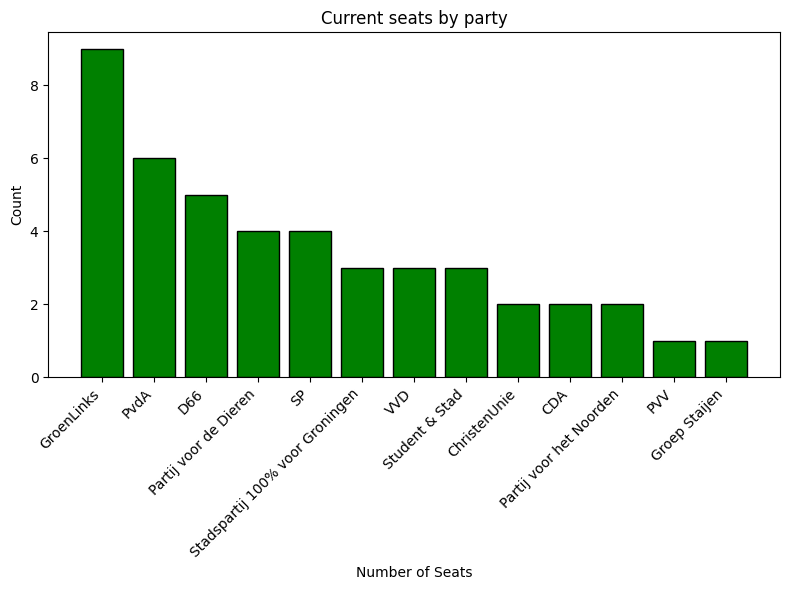

In [55]:
# Munincipal party distribution
parties = [
    "GroenLinks", "PvdA", "D66", "Partij voor de Dieren", "SP",
    "Stadspartij 100% voor Groningen", "VVD", "Student & Stad", "ChristenUnie",
    "CDA", "Partij voor het Noorden", "PVV", "Groep Staijen"
]
seats = [9, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1]

# Plotting the distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(parties, seats, color= 'green', edgecolor='black')
plt.title('Current seats by party')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


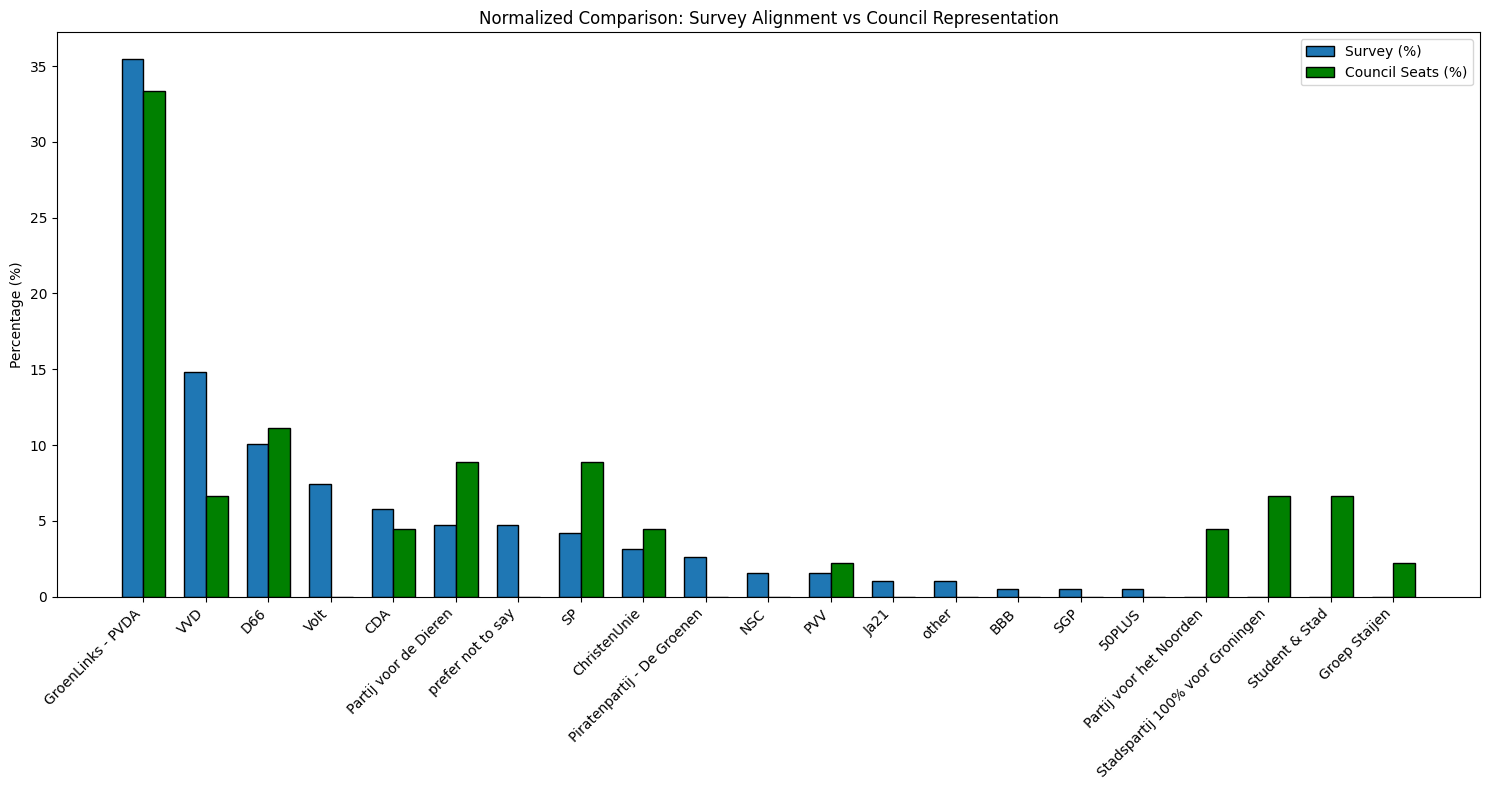

In [56]:
# Survey data
survey_counts = {
    'GroenLinks - PVDA': 67, 'VVD': 28, 'D66': 19, 'Volt': 14, 'CDA': 11,
    'Partij voor de Dieren': 9, 'prefer not to say': 9, 'SP': 8,
    'ChristenUnie': 6, 'Piratenpartij - De Groenen': 5, 'PVV': 3, 'NSC': 3,
    'other': 2, 'Ja21': 2, '50PLUS': 1, 'SGP': 1, 'BBB': 1
}
survey_series = pd.Series(survey_counts)

# Council seat data
seats_data = {
    'GroenLinks': 9, 'PvdA': 6, 'D66': 5, 'Partij voor de Dieren': 4, 'SP': 4,
    'Stadspartij 100% voor Groningen': 3, 'VVD': 3, 'Student & Stad': 3,
    'ChristenUnie': 2, 'CDA': 2, 'Partij voor het Noorden': 2,
    'PVV': 1, 'Groep Staijen': 1
}
seats_series = pd.Series(seats_data)

# Merge GroenLinks + PvdA 
seats_series_combined = seats_series.copy()
seats_series_combined['GroenLinks - PVDA'] = seats_series_combined.pop('GroenLinks') + seats_series_combined.pop('PvdA')

all_parties = sorted(set(survey_series.index).union(set(seats_series_combined.index)))
survey_aligned = survey_series.reindex(all_parties, fill_value=0)
seats_aligned = seats_series_combined.reindex(all_parties, fill_value=0)

# Normalize percentages
survey_normalized = (survey_aligned / survey_aligned.sum()) * 100
seats_normalized = (seats_aligned / seats_aligned.sum()) * 100

sorted_index = survey_normalized.sort_values(ascending=False).index
survey_sorted = survey_normalized[sorted_index]
seats_sorted = seats_normalized[sorted_index]

# Plot
x = range(len(sorted_index))
width = 0.35

plt.figure(figsize=(15, 8))
plt.bar(x, survey_sorted.values, width=width, label='Survey (%)', align='center', edgecolor='black')
plt.bar([i + width for i in x], seats_sorted.values, width=width, label='Council Seats (%)', align='center', color = 'green', edgecolor='black')

plt.xticks([i + width/2 for i in x], sorted_index, rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.title('Normalized Comparison: Survey Alignment vs Council Representation')
plt.legend()
plt.tight_layout()
plt.show()

### Q16

In [1]:
'''
Q16_values = df['Q16_Is there anything you would like to add about your opinion on CCTV surveillance? (Optional)'].dropna().tolist()
for value in Q16_values:
    print(value)
    print('\n')
'''

"\nQ16_values = df['Q16_Is there anything you would like to add about your opinion on CCTV surveillance? (Optional)'].dropna().tolist()\nfor value in Q16_values:\n    print(value)\n    print('\n')\n"